In [ ]:
import pandas as pd
import matplotlib as mat
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
import joblib
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))


In [62]:
from load_data import load_data

data = load_data('../data/archive.zip', filename='loan_data.csv')
data = pd.read_csv('../data/loan_data.csv')

In [63]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [64]:
data.shape

(45000, 14)

In [65]:
data_types = data.dtypes

data_types

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [67]:
data['person_age'] = data['person_age'].astype('int')
data['person_age'].dtype

dtype('int32')

In [68]:
missing_values = data.isnull().sum()
missing_values

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [69]:
data.duplicated().sum()

0

In [70]:
summary_statistics = data.describe()
summary_statistics

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [71]:
from data_preprocessing import DataProcessing
cols = ['person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
df = DataProcessing(data)
df.outlier_removal(data, cols)


C:\Users\Admin\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  
C:\Users\Admin\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  
C:\Users\Admin\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  
C:\Users\Admin\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  
C:\Users\Admin\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  
C:\Users\Admin\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
11,21,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1
19,24,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


## Remove 2447 outlier or 1% contamination

In [72]:
categorical_columns = [var for var in data.columns if data[var].dtype == 'object']
numerical_columns = [var for var in data.columns if data[var].dtype != 'object']

print(f'Categorical Columns {categorical_columns}')
print(f'Numerical Columns {numerical_columns}')

Categorical Columns ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical Columns ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status', 'predict']


In [73]:
categorical_columns

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [74]:
data['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [75]:
data['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [76]:
def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    threshold = 0.05 * total_count
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    ax.axhline(threshold, color='red', linestyle='--', label=f'0.05% of total count ({threshold:.0f})')
    
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center")
    
    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.tight_layout()
    
    plt.legend()
    plt.show()


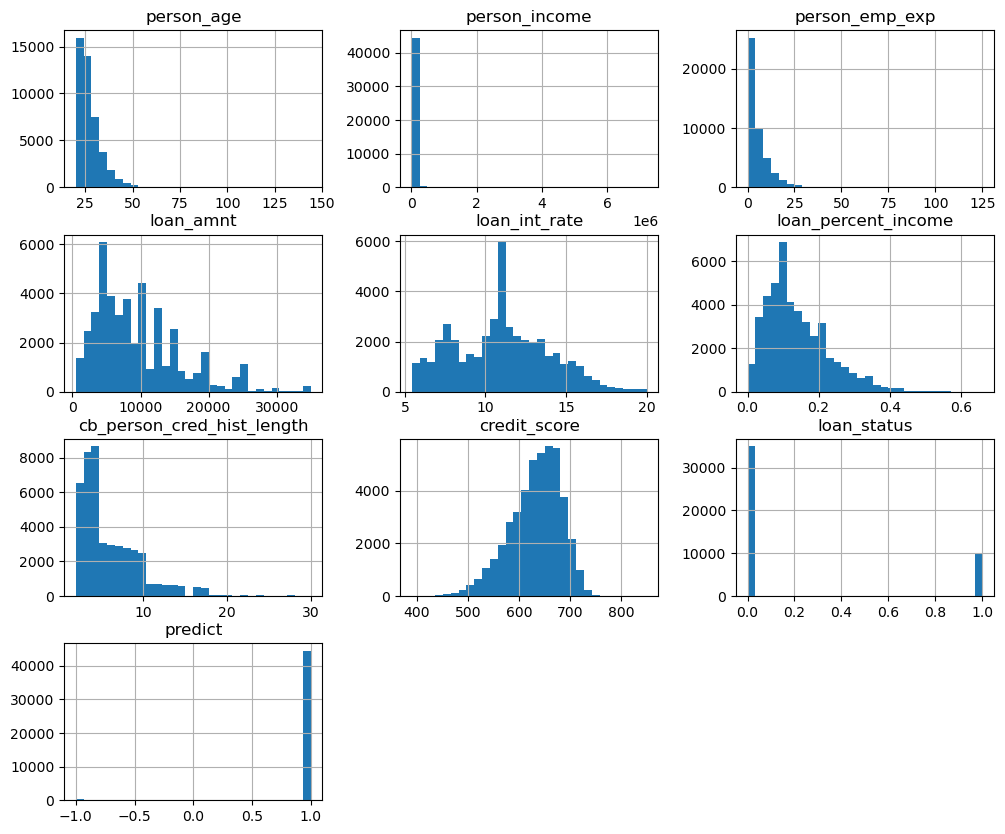

In [77]:
data[numerical_columns].hist(bins=30, figsize=(12,10))
plt.show()

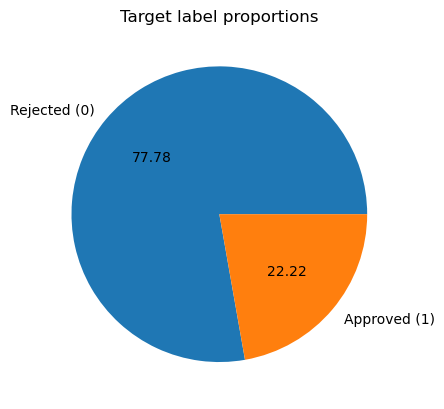

In [78]:
label_prop = data['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

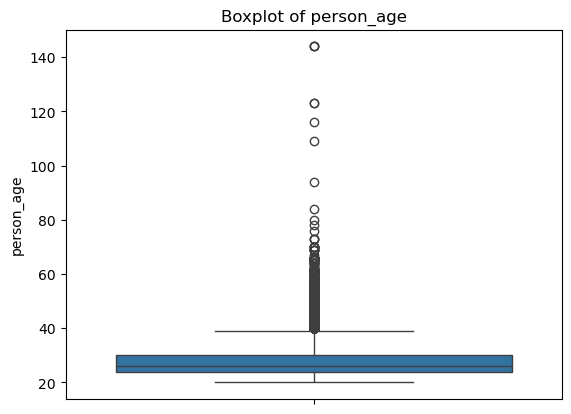

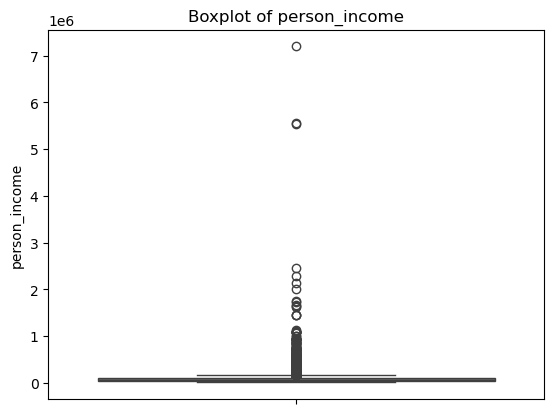

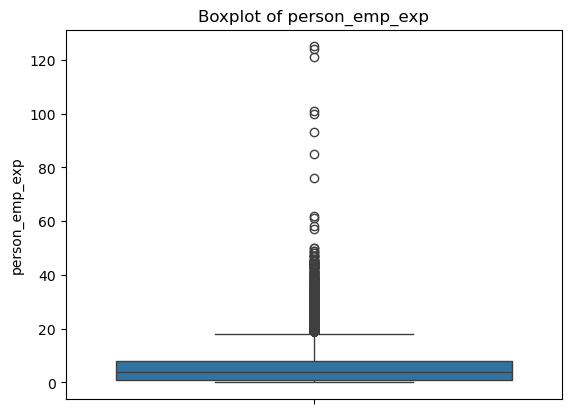

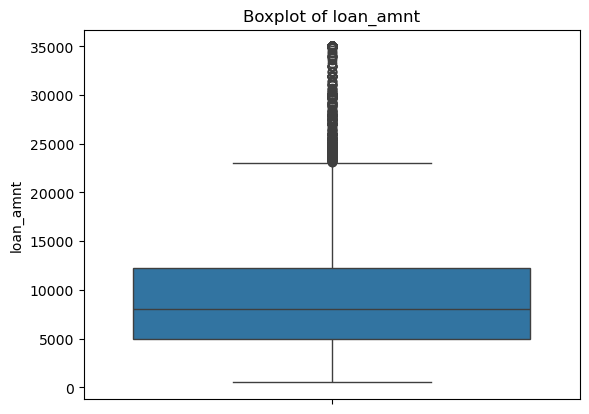

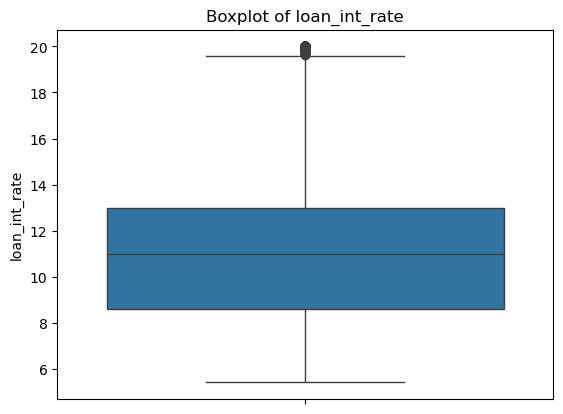

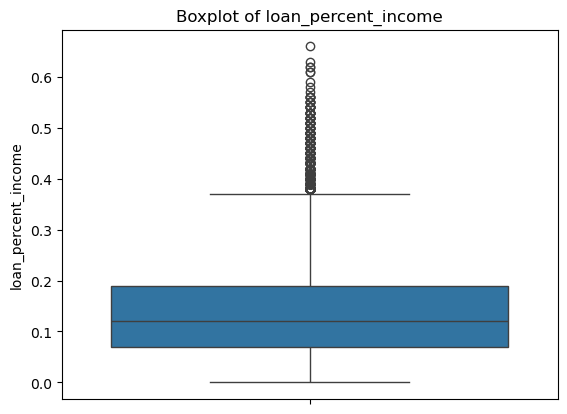

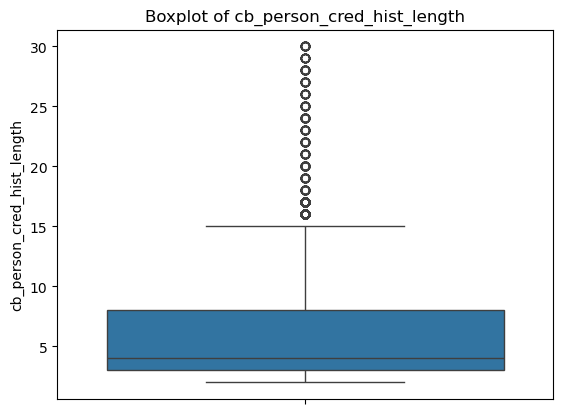

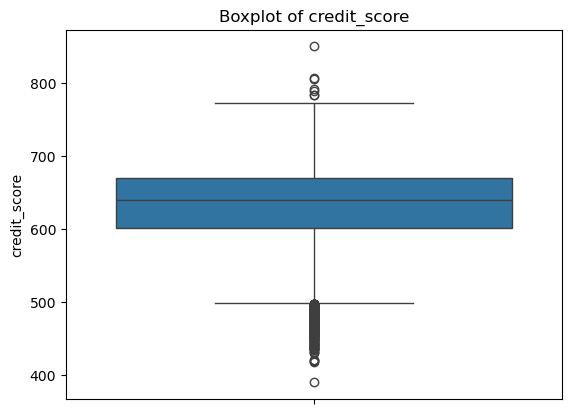

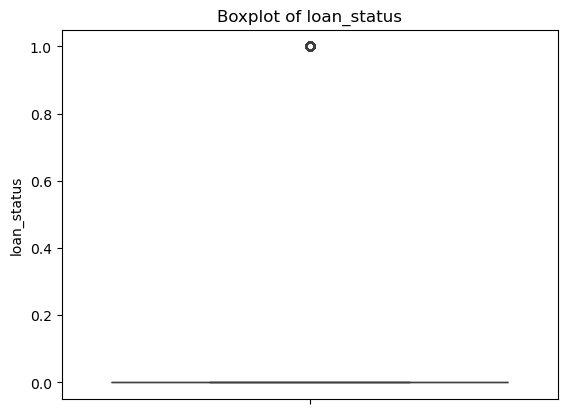

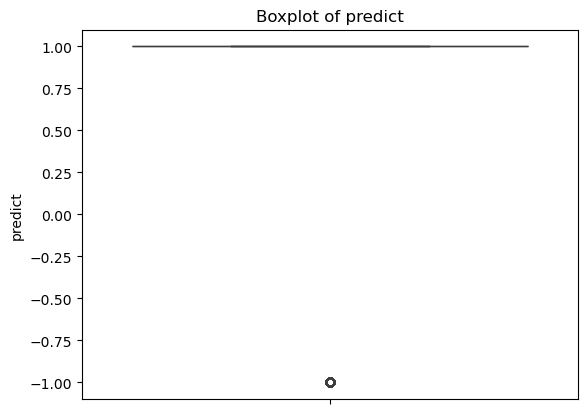

In [79]:
for col in numerical_columns:
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

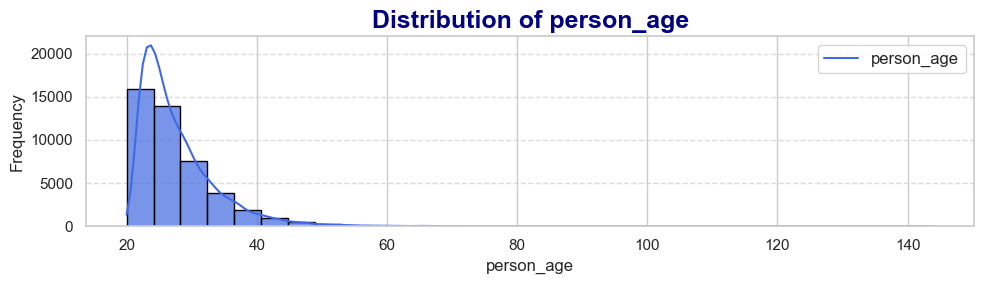

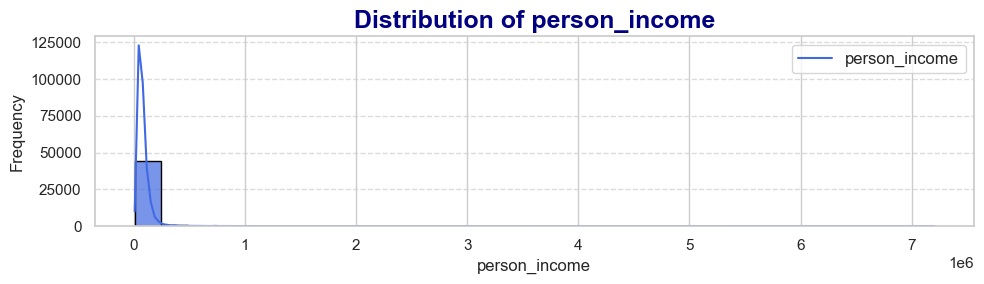

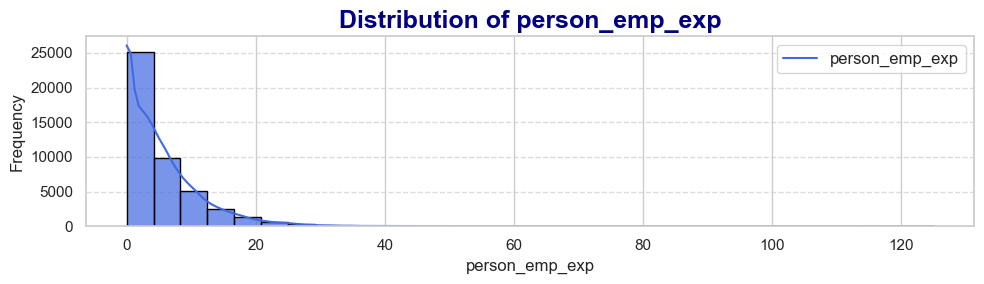

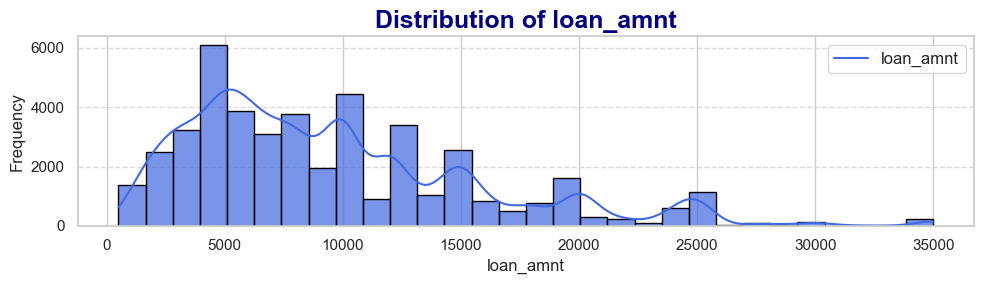

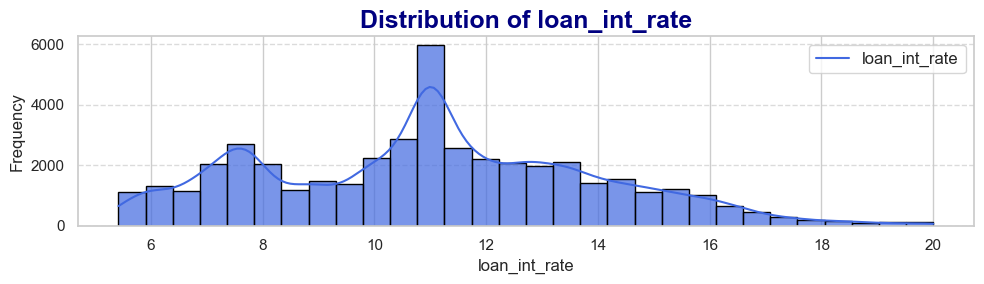

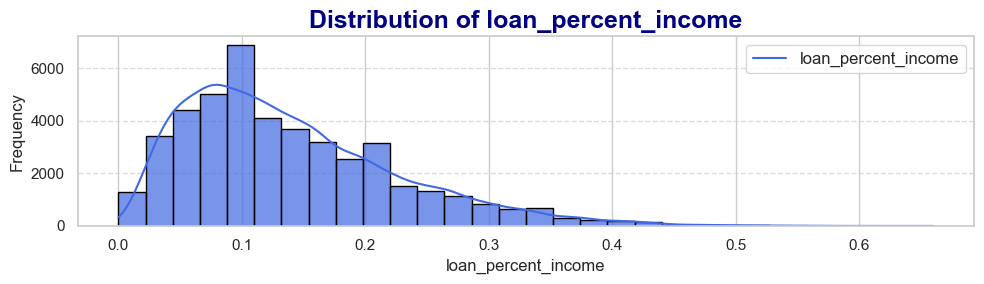

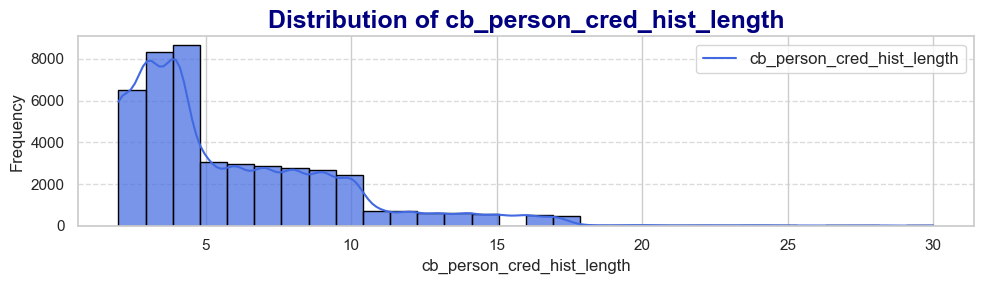

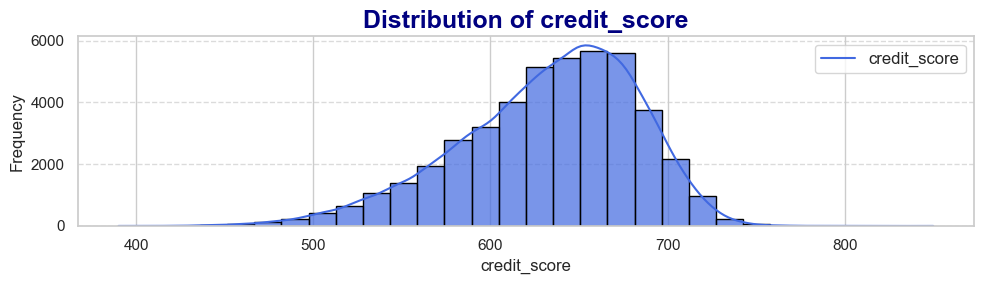

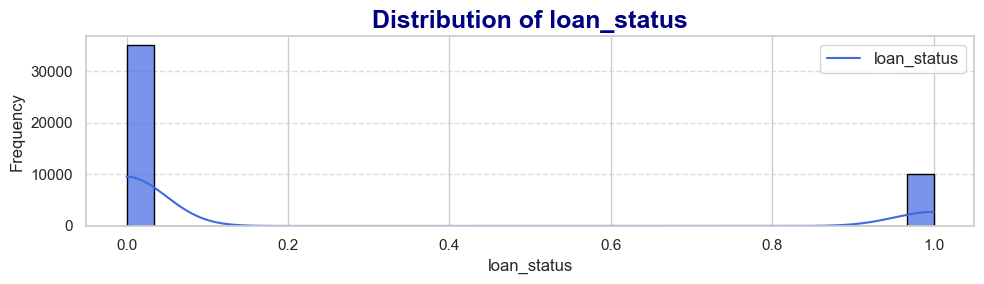

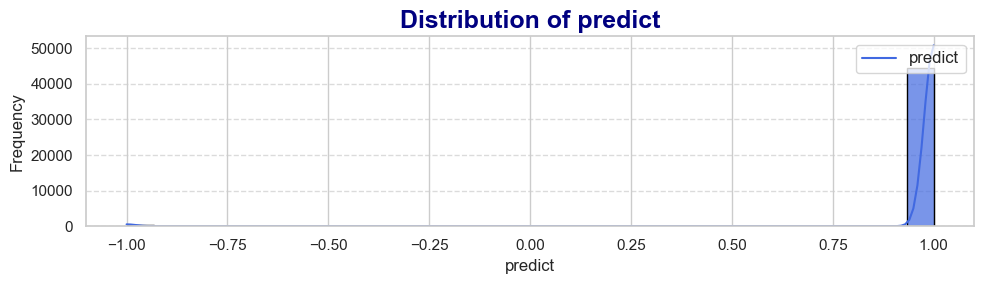

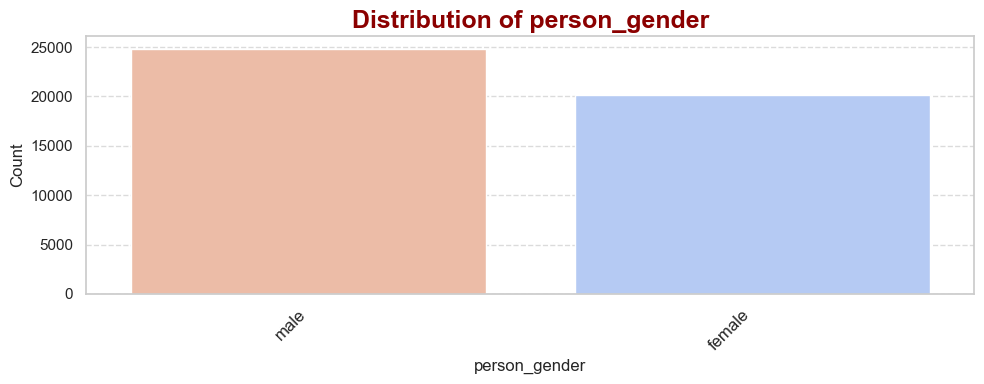

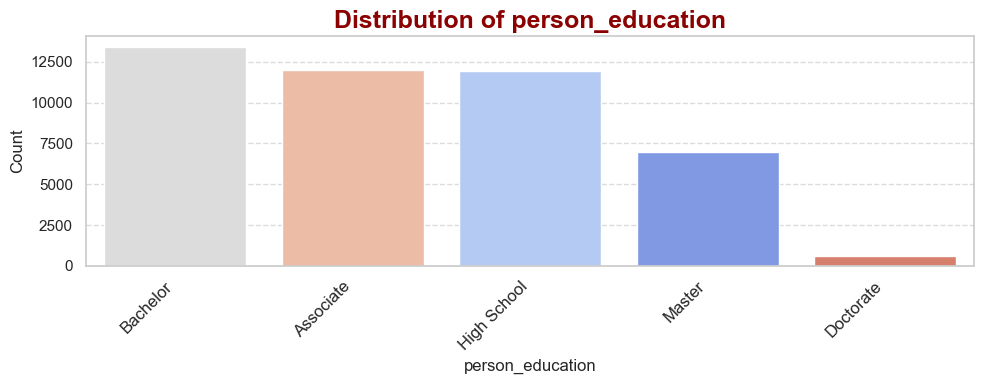

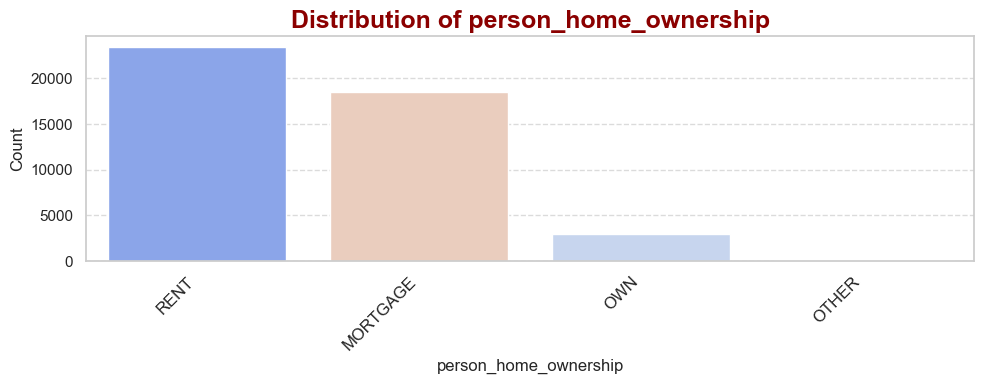

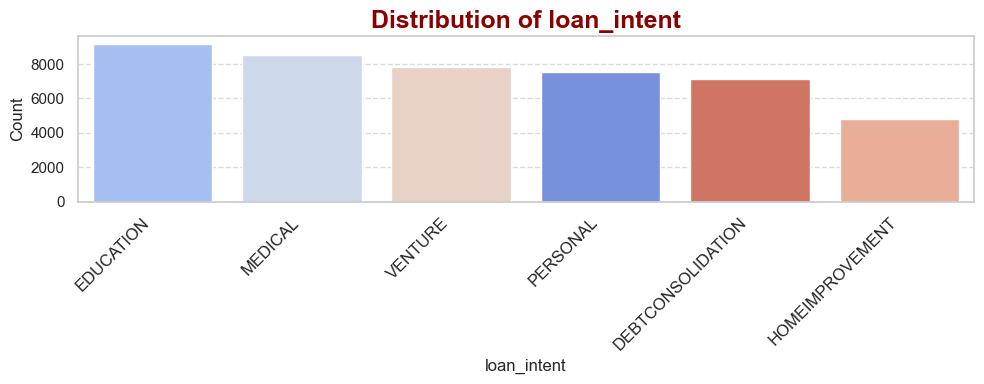

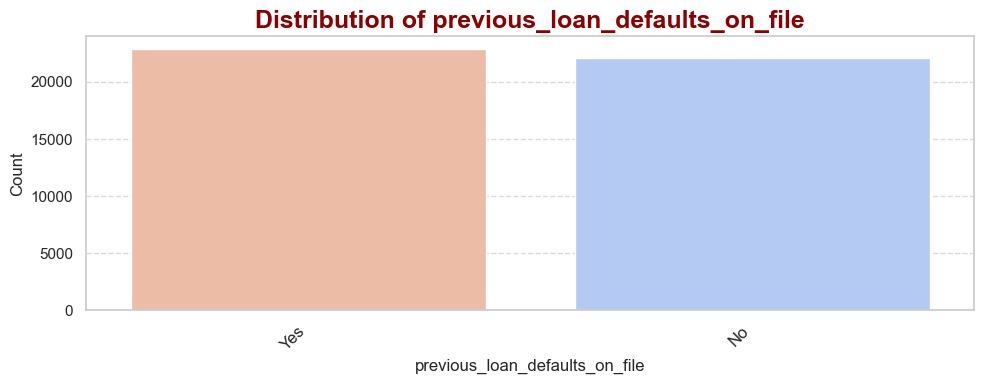

In [80]:
from data_visualization import DataVisualizer

vis = DataVisualizer(data)
vis.univariate_analysis(numerical_columns, categorical_columns)


In [81]:
data["person_gender"].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [84]:
gender_mapping = {'male': 0, 'female': 1}
home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
loan_intent_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
previous_loan_defaults_mapping = {'No': 0, 'Yes': 1}
education_mapping = {
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate':4
}
data['person_gender'] = data['person_gender'].map(gender_mapping)
# data['person_gender'] = data['person_gender'].map(gender_mapping).i
data['person_home_ownership'] = data['person_home_ownership'].map(home_ownership_mapping)
data['loan_intent'] = data['loan_intent'].map(loan_intent_mapping)
data['person_education'] = data['person_education'].map(education_mapping)
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map(previous_loan_defaults_mapping)
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,predict
0,22,1,3,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1,1
1,21,1,0,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0,1
2,25,1,0,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1,1
3,23,1,2,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1,1
4,24,0,3,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1,1


In [39]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
predict                           0
dtype: int64

In [41]:
pip install feature-engine

  Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 1.0 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.9 MB 1.5 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.9 MB 1.5 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.9 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.9 MB 986.4 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.9 MB 931.6 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.9 MB 931.6 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.9 MB 931.6 kB/s eta 0:00:09
   ------- ---------------------

In [85]:
from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method='iqr', tail='right',
                        variables= ['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file'])

df2 = trimmer.fit_transform(data)

In [49]:
skewed_cols = ['person_age', 'person_income', 'person_emp_exp',
               'loan_amnt', 'loan_percent_income',
               'cb_person_cred_hist_length', 'credit_score']

norm_cols= ['loan_int_rate']

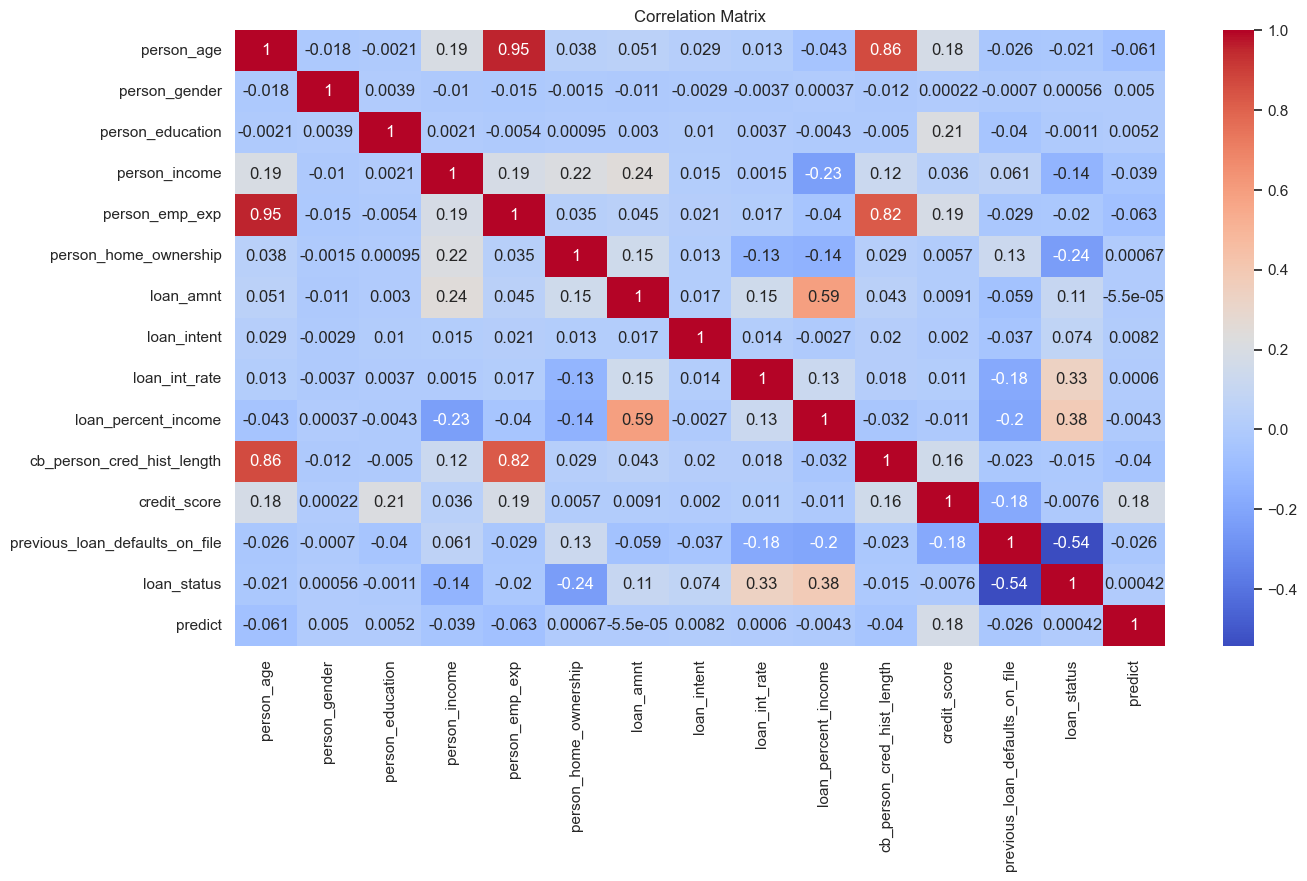

In [86]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [89]:
threshold = 0.1

correlation_matrix = df2.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["loan_status"]) > threshold].tolist()
high_corr_features.remove("loan_status")
print(high_corr_features)

X_selected = data[high_corr_features]
Y = data["loan_status"]

['person_income', 'person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']


In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36000, 5), (36000,), (9000, 5), (9000,))

In [112]:
# y_train = y_train.values.reshape(-1, 1)
# y_test = y_test.values.reshape(-1, 1)

y_train = y_train.ravel()
y_test = y_test.ravel()

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [114]:
model.score(X_train, y_train)

0.7780555555555555

In [115]:
Y_pred = model.predict(X_test)

In [119]:
print(accuracy_score(y_test, Y_pred))

0.7766666666666666


In [120]:
model2 = SVC()
model2.fit(X_train, y_train)

SVC()

In [ ]:
Y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, Y_pred2))

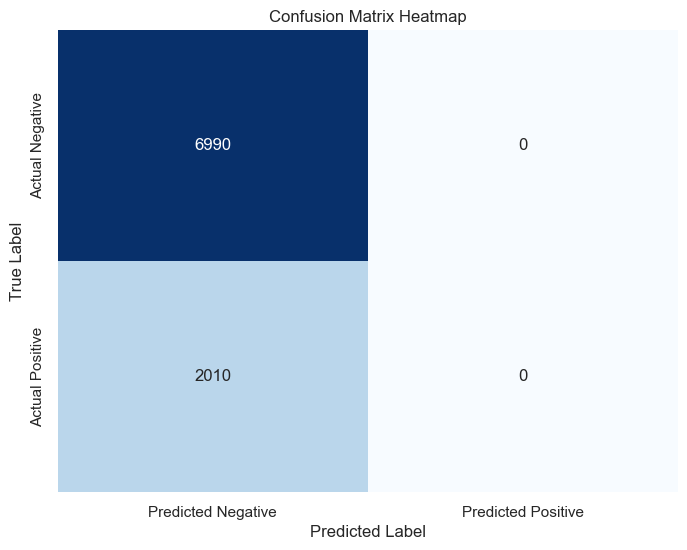

In [118]:
conf_matrix2 =confusion_matrix(y_test, Y_pred2)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)")
plt.show()


In [122]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [123]:
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.37%


In [124]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6990
           1       0.49      0.36      0.42      2010

    accuracy                           0.77      9000
   macro avg       0.66      0.63      0.64      9000
weighted avg       0.75      0.77      0.76      9000



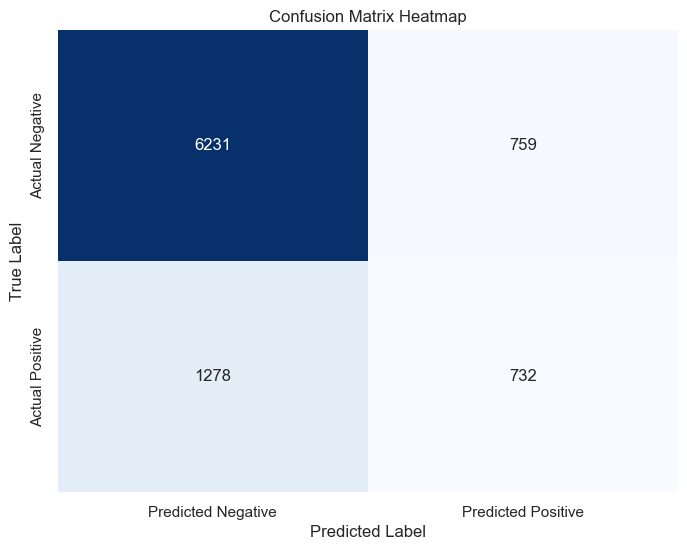

In [125]:
conf_matrix3 =confusion_matrix(y_test, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:

joblib.dump(knn.fit, 'model.pkl')

['model.pkl']